# [3. 화이트 와인과 레드 와인을 하나의 모델만 사용하여 분류]

## <조건>
- 화이트 와인과 레드 와인 데이터를 합쳐 wine 데이터 셋 생성
- 입력이 화이트 와인인지 레드 와인인지에 관계없이 와인 품질을 분류하는 모델 생성
- 모델의 성능을 향상시킬 수 있는 방법을 찾아 적용할 것

In [21]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import keras
keras.__version__

from keras import Sequential
from keras.layers import Dense, Activation

import pandas as pd
pd.__version__
pd.options.display.max_rows=15

import numpy as np
np.__version__

from keras.layers import Dropout
from keras.layers import BatchNormalization
import matplotlib.pylab as plt

In [0]:
import pandas as pd
white_wine = pd.read_csv('/gdrive/My Drive/winequality-white.csv', header = 'infer')
red_wine = pd.read_csv('/gdrive/My Drive/winequality-red.csv', header = 'infer')

In [4]:
white_wine["type"] = 0
red_wine["type"] = 1

print(white_wine.head())
print(red_wine.head())

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.0              0.27         0.36  ...      8.8        6     0
1            6.3              0.30         0.34  ...      9.5        6     0
2            8.1              0.28         0.40  ...     10.1        6     0
3            7.2              0.23         0.32  ...      9.9        6     0
4            7.2              0.23         0.32  ...      9.9        6     0

[5 rows x 13 columns]
   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.4              0.70         0.00  ...      9.4        5     1
1            7.8              0.88         0.00  ...      9.8        5     1
2            7.8              0.76         0.04  ...      9.8        5     1
3           11.2              0.28         0.56  ...      9.8        6     1
4            7.4              0.70         0.00  ...      9.4        5     1

[5 rows x 13 columns]


In [5]:
import pandas as pd

wine = pd.concat([white_wine, red_wine])
print(wine)

      fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0               7.0             0.270         0.36  ...      8.8        6     0
1               6.3             0.300         0.34  ...      9.5        6     0
2               8.1             0.280         0.40  ...     10.1        6     0
3               7.2             0.230         0.32  ...      9.9        6     0
4               7.2             0.230         0.32  ...      9.9        6     0
...             ...               ...          ...  ...      ...      ...   ...
1594            6.2             0.600         0.08  ...     10.5        5     1
1595            5.9             0.550         0.10  ...     11.2        6     1
1596            6.3             0.510         0.13  ...     11.0        6     1
1597            5.9             0.645         0.12  ...     10.2        5     1
1598            6.0             0.310         0.47  ...     11.0        6     1

[6497 rows x 13 columns]


In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

def generate_data(df, t_r):

  X = df.drop(['quality'], axis = 1)
  Y = df['quality']

  X_train, X_test = train_test_split(X, test_size = 1-t_r, random_state = 0)
  Y_train, Y_test = train_test_split(Y, test_size = 1-t_r, random_state = 0)


  return X_train.values, Y_train, X_test.values, Y_test

In [27]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [0]:
A_train, B_train, A_test, B_test = generate_data(wine, 0.7)

### 2) 기본조건 :  HiddenLayer = 3, epoch = 100, batch_size = 128
 

In [31]:
model = Sequential()

model.add(Dense(64, input_dim = 12, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(12, activation = 'softmax'))

#opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(A_train, B_train, validation_data = (A_test, B_test), epochs=100, batch_size = 128)

Train on 4547 samples, validate on 1950 samples
Epoch 1/100
4547/4547 [==============================] - 0s 37us/step - loss: 7.0650 - accuracy: 0.2241 - val_loss: 1.6438 - val_accuracy: 0.4246
Epoch 2/100
4547/4547 [==============================] - 0s 17us/step - loss: 1.4832 - accuracy: 0.4047 - val_loss: 1.3446 - val_accuracy: 0.3985
Epoch 3/100
4547/4547 [==============================] - 0s 14us/step - loss: 1.3362 - accuracy: 0.4324 - val_loss: 1.2955 - val_accuracy: 0.4318
Epoch 4/100
4547/4547 [==============================] - 0s 16us/step - loss: 1.2957 - accuracy: 0.4500 - val_loss: 1.2673 - val_accuracy: 0.4379
Epoch 5/100
4547/4547 [==============================] - 0s 14us/step - loss: 1.2705 - accuracy: 0.4563 - val_loss: 1.2621 - val_accuracy: 0.4323
Epoch 6/100
4547/4547 [==============================] - 0s 15us/step - loss: 1.2601 - accuracy: 0.4581 - val_loss: 1.2533 - val_accuracy: 0.4451
Epoch 7/100
4547/4547 [==============================] - 0s 15us/step - loss

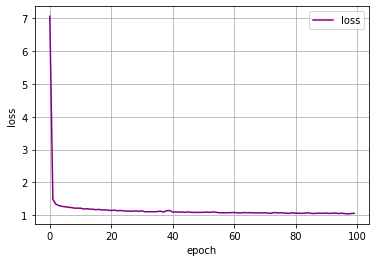

In [32]:
import numpy
import matplotlib.pylab as plt

b_loss = history.history['loss']
b_acc = history.history['accuracy']

a_len = numpy.arange(len(b_acc))

plt.plot(a_len, b_loss, '-', c='purple', markersize=3, label = 'loss')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

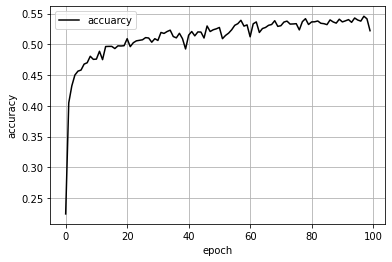

In [33]:
a_len = numpy.arange(len(b_acc))

plt.plot(a_len, b_acc, '-', c='black', markersize=3, label = 'accuarcy')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

In [34]:
test_loss3, test_acc3 = model.evaluate(A_test, B_test, verbose=2)
print(test_acc3)

0.5343589782714844


### 이전에 했던 최적화 방법 적용

- 조건
  - Hidden Layer = 6
  - epoch = 1000
  - batch_size = 128
  - he_normalization : 가중치 정규화
  - 데이터 정규화
  - Dropout

 


In [8]:
from keras.layers import Dropout
from keras.layers import BatchNormalization
model = Sequential()

model.add(Dense(512, input_dim = 12, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu' ,kernel_initializer = 'he_normal'))
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(12, activation = 'softmax'))

#opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(A_train, B_train, validation_data = (A_test, B_test), epochs=1000, batch_size = 128)

Train on 4547 samples, validate on 1950 samples
Epoch 1/1000
4547/4547 [==============================] - 1s 150us/step - loss: 11.2675 - accuracy: 0.2692 - val_loss: 2.2313 - val_accuracy: 0.2621
Epoch 2/1000
4547/4547 [==============================] - 0s 86us/step - loss: 2.7966 - accuracy: 0.2958 - val_loss: 2.2557 - val_accuracy: 0.2544
Epoch 3/1000
4547/4547 [==============================] - 0s 86us/step - loss: 2.1520 - accuracy: 0.3233 - val_loss: 1.7299 - val_accuracy: 0.4303
Epoch 4/1000
4547/4547 [==============================] - 0s 88us/step - loss: 1.8898 - accuracy: 0.3580 - val_loss: 1.5599 - val_accuracy: 0.4303
Epoch 5/1000
4547/4547 [==============================] - 0s 89us/step - loss: 1.7140 - accuracy: 0.3699 - val_loss: 1.4061 - val_accuracy: 0.4303
Epoch 6/1000
4547/4547 [==============================] - 0s 85us/step - loss: 1.6053 - accuracy: 0.3983 - val_loss: 1.5691 - val_accuracy: 0.4303
Epoch 7/1000
4547/4547 [==============================] - 0s 85us/st

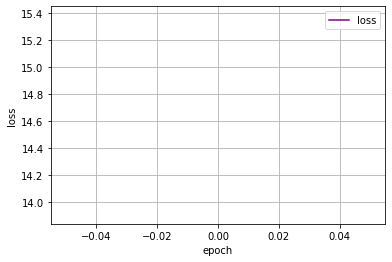

In [36]:
import numpy
import matplotlib.pylab as plt

b_loss = history.history['loss']
b_acc = history.history['accuracy']

a_len = numpy.arange(len(b_acc))

plt.plot(a_len, b_loss, '-', c='purple', markersize=3, label = 'loss')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

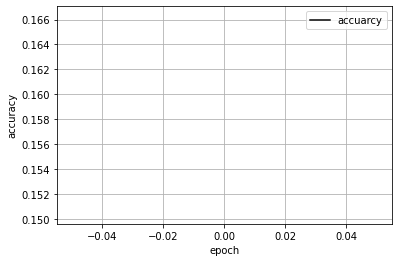

In [37]:
a_len = numpy.arange(len(b_acc))

plt.plot(a_len, b_acc, '-', c='black', markersize=3, label = 'accuarcy')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

In [38]:
test_loss3, test_acc3 = model.evaluate(A_test, B_test, verbose=2)
print(test_acc3)

0.062051281332969666


### 3) 2)에서 Dropout 제외 후 epoch = 200으로 설정


In [39]:
from keras.layers import Dropout
from keras.layers import BatchNormalization
model = Sequential()

model.add(Dense(512, input_dim = 12, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(256, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(64, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(32, activation = 'relu' ,kernel_initializer = 'he_normal'))
model.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(12, activation = 'softmax'))

#opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(A_train, B_train, validation_data = (A_test, B_test), epochs=200, batch_size = 128)

Train on 4547 samples, validate on 1950 samples
Epoch 1/200
4547/4547 [==============================] - 0s 109us/step - loss: 6.4734 - accuracy: 0.1643 - val_loss: 2.4220 - val_accuracy: 0.1492
Epoch 2/200
4547/4547 [==============================] - 0s 70us/step - loss: 2.0905 - accuracy: 0.1586 - val_loss: 1.4265 - val_accuracy: 0.4231
Epoch 3/200
4547/4547 [==============================] - 0s 73us/step - loss: 1.4053 - accuracy: 0.3912 - val_loss: 1.4128 - val_accuracy: 0.3836
Epoch 4/200
4547/4547 [==============================] - 0s 71us/step - loss: 1.3574 - accuracy: 0.4027 - val_loss: 1.2956 - val_accuracy: 0.4205
Epoch 5/200
4547/4547 [==============================] - 0s 69us/step - loss: 1.3358 - accuracy: 0.4174 - val_loss: 1.3265 - val_accuracy: 0.4087
Epoch 6/200
4547/4547 [==============================] - 0s 68us/step - loss: 1.3483 - accuracy: 0.4163 - val_loss: 1.2489 - val_accuracy: 0.4318
Epoch 7/200
4547/4547 [==============================] - 0s 69us/step - los

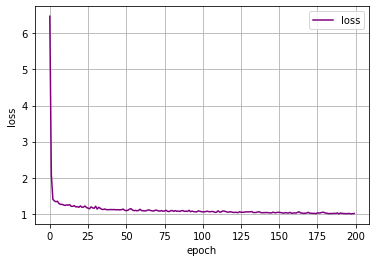

In [40]:
import numpy
import matplotlib.pylab as plt

b_loss = history.history['loss']
b_acc = history.history['accuracy']

a_len = numpy.arange(len(b_acc))

plt.plot(a_len, b_loss, '-', c='purple', markersize=3, label = 'loss')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

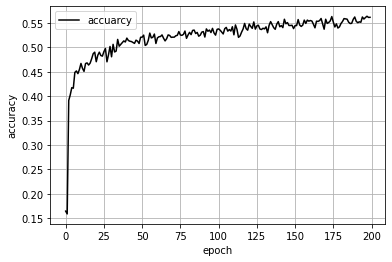

In [41]:
a_len = numpy.arange(len(b_acc))

plt.plot(a_len, b_acc, '-', c='black', markersize=3, label = 'accuarcy')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

In [42]:
test_loss3, test_acc3 = model.evaluate(A_test, B_test, verbose=2)
print(test_acc3)

0.5328205227851868


### 4) 또 다른 정규화 방법과 frac = 0.5


In [50]:
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  ...   alcohol  quality  type
0       0.264463          0.126667     0.216867  ...  0.115942      0.5   0.0
1       0.206612          0.146667     0.204819  ...  0.217391      0.5   0.0
2       0.355372          0.133333     0.240964  ...  0.304348      0.5   0.0
3       0.280992          0.100000     0.192771  ...  0.275362      0.5   0.0
4       0.280992          0.100000     0.192771  ...  0.275362      0.5   0.0

[5 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        0.282257          0.173111  ...     0.469730     0.246114
std         0.107143          0.109758  ...     0.145543     0.430779
min         0.000000          0.000000  ...     0.000000     0.000000
25%         0.214876          0.100000  ...     0.333333     0.000000
50%         0.264463          0.140000  ...     0.500000     0.000000
75%         0.32231

In [51]:
import numpy as np
wine_shuffle = wine_norm.sample(frac=0.5)
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
1385       0.347107          0.486667     0.150602  ...  0.173913  0.333333   1.0
1388       0.289256          0.066667     0.174699  ...  0.478261  0.666667   0.0
734        0.322314          0.320000     0.120482  ...  0.188406  0.333333   1.0
4071       0.314050          0.120000     0.192771  ...  0.579710  0.500000   0.0
3415       0.190083          0.146667     0.180723  ...  0.681159  0.666667   0.0

[5 rows x 13 columns]
[[0.34710744 0.48666667 0.15060241 0.04294479 0.11129568 0.11458333
  0.18202765 0.18449971 0.36434109 0.11235955 0.17391304 0.33333333
  1.        ]
 [0.2892562  0.06666667 0.1746988  0.00920245 0.05813953 0.03819444
  0.3156682  0.09041835 0.37209302 0.14606742 0.47826087 0.66666667
  0.        ]
 [0.32231405 0.32       0.12048193 0.02147239 0.10963455 0.02777778
  0.07603687 0.22344322 0.58914729 0.2247191  0.1884058  0.33333333
  1.        ]
 [0.31404959 0.12       0.19277108 

In [0]:
A_train, B_train, A_test, B_test = generate_data(wine, 0.7)

In [53]:
from keras.layers import Dropout
from keras.layers import BatchNormalization
model = Sequential()

model.add(Dense(512, input_dim = 12, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu' ,kernel_initializer = 'he_normal'))
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(12, activation = 'softmax'))

#opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(A_train, B_train, validation_data = (A_test, B_test), epochs=1000, batch_size = 128)

Train on 4547 samples, validate on 1950 samples
Epoch 1/1000
4547/4547 [==============================] - 1s 157us/step - loss: 10.0431 - accuracy: 0.1746 - val_loss: 2.2972 - val_accuracy: 0.0928
Epoch 2/1000
4547/4547 [==============================] - 0s 89us/step - loss: 2.7921 - accuracy: 0.2703 - val_loss: 2.0147 - val_accuracy: 0.4118
Epoch 3/1000
4547/4547 [==============================] - 0s 87us/step - loss: 2.1859 - accuracy: 0.3253 - val_loss: 1.7856 - val_accuracy: 0.4303
Epoch 4/1000
4547/4547 [==============================] - 0s 89us/step - loss: 1.9236 - accuracy: 0.3550 - val_loss: 1.6537 - val_accuracy: 0.4303
Epoch 5/1000
4547/4547 [==============================] - 0s 87us/step - loss: 1.7661 - accuracy: 0.3732 - val_loss: 1.5774 - val_accuracy: 0.4226
Epoch 6/1000
4547/4547 [==============================] - 0s 93us/step - loss: 1.6357 - accuracy: 0.3853 - val_loss: 1.5211 - val_accuracy: 0.4303
Epoch 7/1000
4547/4547 [==============================] - 0s 90us/st

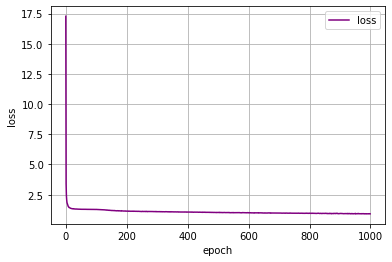

In [47]:
import numpy
import matplotlib.pylab as plt

b_loss = history.history['loss']
b_acc = history.history['accuracy']

a_len = numpy.arange(len(b_acc))

plt.plot(a_len, b_loss, '-', c='purple', markersize=3, label = 'loss')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

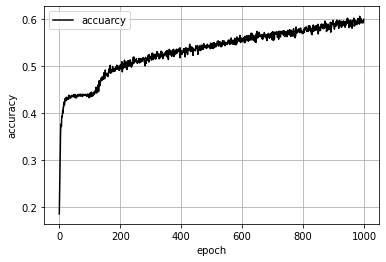

In [48]:
a_len = numpy.arange(len(b_acc))

plt.plot(a_len, b_acc, '-', c='black', markersize=3, label = 'accuarcy')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

In [49]:
test_loss3, test_acc3 = model.evaluate(A_test, B_test, verbose=2)
print(test_acc3)

0.5487179756164551
